# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


<Axes: >

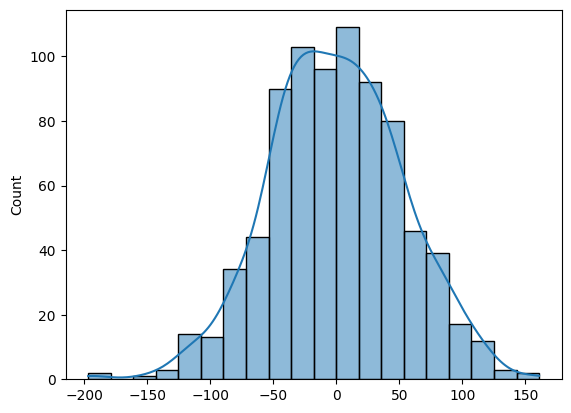

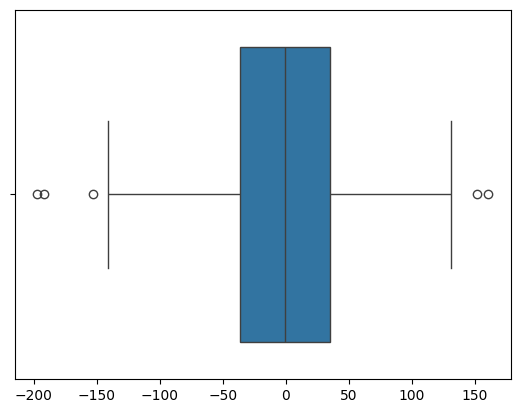

In [290]:
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
# y=14X+10
X=np.random.randn(1000)*50  #normal dist 
Y=14*X+10
Y+= np.random.normal(0, 2, size=Y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=44, shuffle =True)
plt.figure()
sns.histplot(x=X_train,bins=20,kde=True) 
plt.figure()
sns.boxplot(x=X_train)




In [291]:



from sklearn.preprocessing import StandardScaler
X_train_scaled = X_train.reshape(-1, 1)  

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train_scaled, y_train)

LinearRegression()

In [292]:
print(model1.intercept_, model1.coef_)
X_test_scaled = scaler.transform(X_test.reshape(-1,1))
predictions= model1.predict(X_test_scaled)
predections_train=model1.predict(X_train_scaled)

8.02178384188558 [735.34931946]


<Axes: >

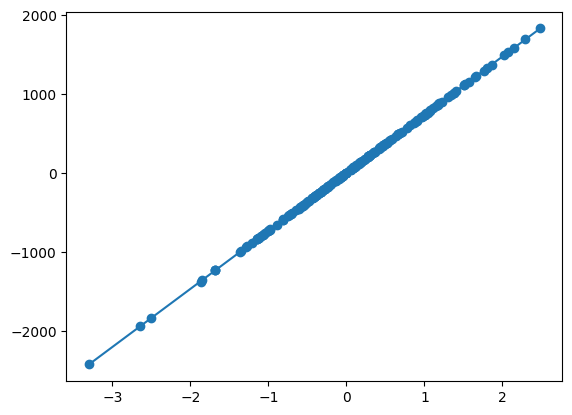

In [293]:

plt.scatter(x=X_test_scaled[:,0] ,y=y_test)
sns.lineplot(x=X_test_scaled[:,0] ,y=predictions)





In [294]:
print ("R^2 TRAIN",model1.score(X_train_scaled, y_train))
print ("R^2 TEST",model1.score(X_test_scaled, y_test))

R^2 TRAIN 0.999993461864564
R^2 TEST 0.9999911055253251


In [295]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print ( "TRAIN MEAN SQUARE ERROR",mean_squared_error(y_train,predections_train))
print ( "TEST MEAN SQUARE ERROR",mean_squared_error(y_test,predictions))

print ( "TRAIN MEAN ABS ERROR",mean_absolute_error(y_train,predections_train))
print ( "TEST MEAN ABS ERROR",mean_absolute_error(y_test,predictions))

print ( "TRAIN R^2 ERROR",r2_score(y_train,predections_train))
print ( "TEST R^2 ERROR",r2_score(y_test,predictions))

TRAIN MEAN SQUARE ERROR 3.5354454589680553
TEST MEAN SQUARE ERROR 4.008974651546518
TRAIN MEAN ABS ERROR 1.493205515754864
TEST MEAN ABS ERROR 1.6011830691442106
TRAIN R^2 ERROR 0.999993461864564
TEST R^2 ERROR 0.9999911055253251


##### insights
- No overfitting or underfitting

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [296]:
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# y=14X+10x+7
X1=np.random.randn(1000)*50  #normal dist 
X2=np.random.randn(1000)*50
Y=14*X1+10*X2+7
Y+= np.random.normal(0, 2, size=Y.shape)
df = pd.DataFrame({
    'X1': X1,
    'X2': X2
})
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=44, shuffle =True)


In [297]:



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train_scaled, y_train)

LinearRegression()

In [298]:
X_test_scaled=scaler.transform(X_test)
predictions= model1.predict(X_test_scaled)
predections_train=model1.predict(X_train_scaled)
print(model1.intercept_ ,model1.coef_)

48.347366339563415 [696.59044298 513.21666157]


In [299]:
print ("R^2 TRAIN",model1.score(X_train_scaled, y_train))
print ("R^2 TEST",model1.score(X_test_scaled, y_test))  
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print ( "TRAIN MEAN SQUARE ERROR",mean_squared_error(y_train,predections_train))
print ( "TEST MEAN SQUARE ERROR",mean_squared_error(y_test,predictions))

print ( "TRAIN MEAN ABS ERROR",mean_absolute_error(y_train,predections_train))
print ( "TEST MEAN ABS ERROR",mean_absolute_error(y_test,predictions))

print ( "TRAIN R^2 ERROR",r2_score(y_train,predections_train))
print ( "TEST R^2 ERROR",r2_score(y_test,predictions))

R^2 TRAIN 0.9999946403080651
R^2 TEST 0.999994604658097
TRAIN MEAN SQUARE ERROR 4.135442353727985
TEST MEAN SQUARE ERROR 4.102259114344613
TRAIN MEAN ABS ERROR 1.6438766801929585
TEST MEAN ABS ERROR 1.6023419905591094
TRAIN R^2 ERROR 0.9999946403080651
TEST R^2 ERROR 0.999994604658097


#### insights
- No overfitting or underfitting


# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



<Axes: >

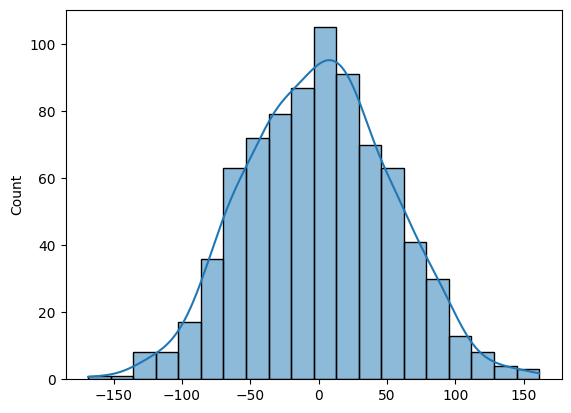

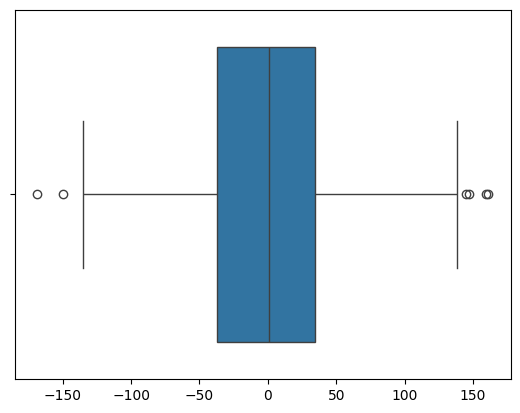

In [300]:
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
# y=14X^2 + 10x+c
X=np.random.randn(1000)*50  #normal dist 
Y=14*(X**2)+10*X+7
Y+= np.random.normal(0, 2, size=Y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=44, shuffle =True)
plt.figure()
sns.histplot(x=X_train,bins=20,kde=True) 
plt.figure()
sns.boxplot(x=X_train)




In [301]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly=scaler.transform(X_test_poly)


In [302]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train_poly, y_train)


LinearRegression()

In [303]:
print(model1.intercept_ ,model1.coef_)

38921.69360936962 [    0.           527.0747087  53010.33359331]


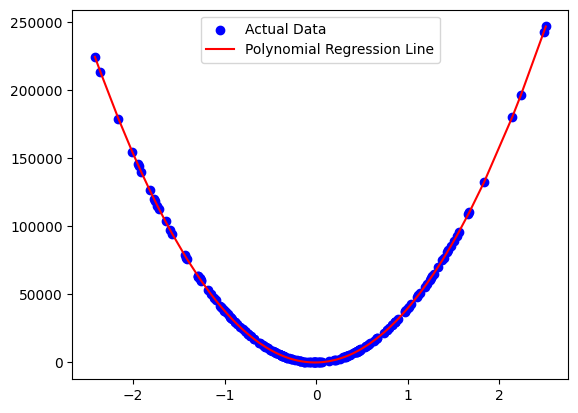

In [304]:

predections_train=model1.predict(X_train_poly)
predictions = model1.predict(X_test_poly)
scaler = StandardScaler()            
X_train_scaled=scaler.fit_transform(X_train)                                    
X_test_scaled = scaler.transform(X_test)
sorted_idx = np.argsort(X_test_scaled[:, 0])    # sort data to plot it
X_test_sorted = X_test_scaled[sorted_idx]
predictions_sorted = predictions[sorted_idx]

plt.scatter(X_test_scaled, y_test, color='blue', label='Actual Data')
plt.plot(X_test_sorted, predictions_sorted, color='red', label='Polynomial Regression Line')
plt.legend()
plt.show()


In [305]:
print ("R^2 TRAIN",model1.score(X_train_poly, y_train))
print ("R^2 TEST",model1.score(X_test_poly, y_test))  
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print ( "TRAIN MEAN SQUARE ERROR",mean_squared_error(y_train,predections_train))
print ( "TEST MEAN SQUARE ERROR",mean_squared_error(y_test,predictions))

print ( "TRAIN MEAN ABS ERROR",mean_absolute_error(y_train,predections_train))
print ( "TEST MEAN ABS ERROR",mean_absolute_error(y_test,predictions))

print ( "TRAIN R^2 ERROR",r2_score(y_train,predections_train))
print ( "TEST R^2 ERROR",r2_score(y_test,predictions))

R^2 TRAIN 0.9999999986800503
R^2 TEST 0.999999998462463
TRAIN MEAN SQUARE ERROR 3.7129334339549276
TEST MEAN SQUARE ERROR 3.619789216158354
TRAIN MEAN ABS ERROR 1.5481572521125424
TEST MEAN ABS ERROR 1.4830168894724034
TRAIN R^2 ERROR 0.9999999986800503
TEST R^2 ERROR 0.999999998462463


#### insights 
- No overfitting or underfitting.

-------------------------------------------------------------------------------------------

# Title: Airline Flights Price Prediction Project
### Dataset: rohitgrewal/airlines-flights-data
### This project analyzes and predicts flight prices using the "rohitgrewal/airlines-flights-data" dataset.
#### It covers data cleaning, exploratory analysis, feature engineering, encoding, regression modeling, and evaluation.

In [306]:

import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Abdallah\.cache\kagglehub\datasets\rohitgrewal\airlines-flights-data\versions\1


In [307]:
os.listdir(path)

['airlines_flights_data.csv']

In [308]:
full_path = os.path.join(path,os.listdir(path)[0])

In [309]:
import pandas as pd
df = pd.read_csv(full_path)

In [310]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Inspect dataset

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


#### insights 
=> there are no null or missing values in the dataset

In [312]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


#### insights
- the index column is useless and could mislead the model
- the median is approximately equal to the mean for both duration and days left suggesting a normal distribution
- for price the mean is greater than the median suggesting a right skewed distribution

In [313]:
df.drop(columns='index',inplace=True)
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [314]:
print(df.duplicated().sum())


0


#### insights 
- no duplicates

--------------------------------------------------------

##  Identify correlations and Detecting outliers 

<Axes: xlabel='price', ylabel='Count'>

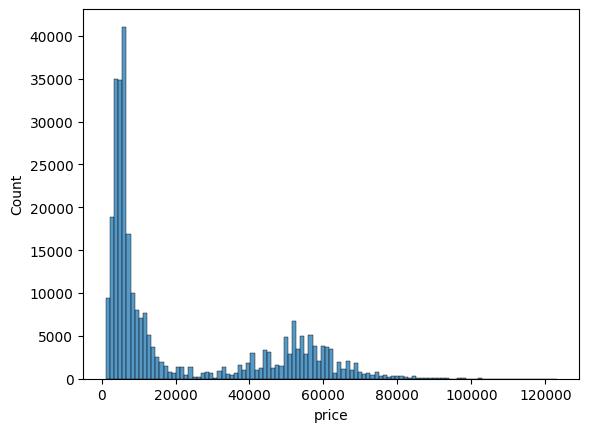

In [315]:
import seaborn as sns
sns.histplot(x='price',data=df)

<Axes: xlabel='price'>

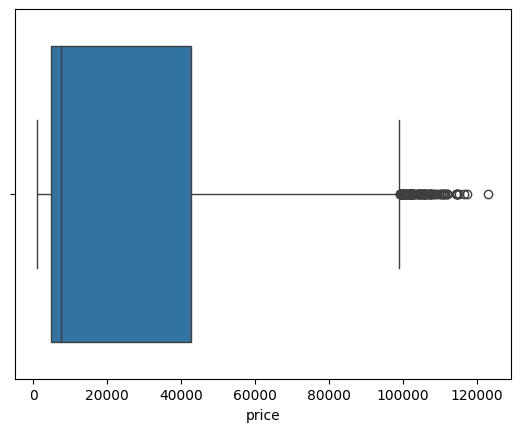

In [316]:
sns.boxplot(x='price',data=df)

In [317]:
Q1p = df['price'].quantile(0.25)
Q3p = df['price'].quantile(0.75)
IQR = Q3p - Q1p
lower_bound = Q1p - 1.5 * IQR
upper_bound = Q3p + 1.5 * IQR
outliers_price = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

print(outliers_price.loc[:,['source_city','destination_city','duration','class','stops','price','airline','days_left']].sort_values(by='price',ascending=False))


# print outliers

       source_city destination_city  duration     class        stops   price  \
261377     Kolkata            Delhi     13.50  Business          one  123071   
216096       Delhi          Kolkata     10.92  Business  two_or_more  117307   
215859       Delhi          Kolkata     21.08  Business  two_or_more  116562   
277345   Hyderabad           Mumbai     16.42  Business          one  115211   
270999     Kolkata        Hyderabad      9.50  Business          one  114705   
...            ...              ...       ...       ...          ...     ...   
264268     Kolkata           Mumbai     11.00  Business          one   99327   
264192     Kolkata           Mumbai      9.83  Business          one   99327   
264191     Kolkata           Mumbai     10.00  Business          one   99204   
264267     Kolkata           Mumbai     10.00  Business          one   99204   
216094       Delhi          Kolkata      6.50  Business          one   99129   

        airline  days_left  
261377  Vi

In [318]:
print(outliers_price['airline'].value_counts())  


airline
Vistara    123
Name: count, dtype: int64


#### insights
- after searching i found that business class flights in india usually range from around 15000 to 50000 or sometimes a bit more at first i thought we should remove the outliers but i noticed that they all belong to the same airline Vistara when i searched more i found that Vistara business class tickets can reach 60000 to 70000 during peak times so these higher prices are actually ok and may be explained by other features

--------------------------------------------------------

<Axes: xlabel='days_left', ylabel='Count'>

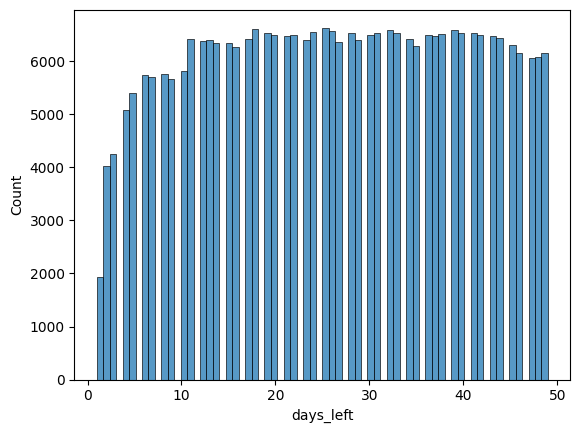

In [319]:
sns.histplot(x='days_left',data=df)

<Axes: xlabel='days_left'>

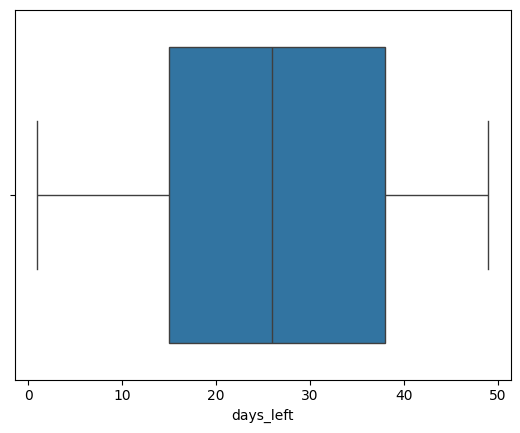

In [320]:
sns.boxplot(x='days_left',data=df)

--------------------------------------------------------

<Axes: xlabel='duration', ylabel='Count'>

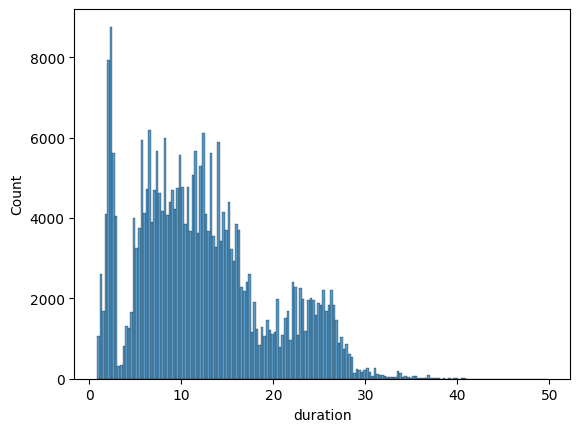

In [321]:
sns.histplot(x='duration',data=df)

<Axes: xlabel='duration'>

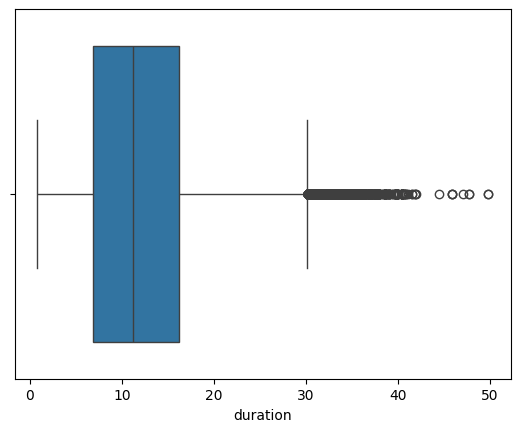

In [322]:
sns.boxplot(x='duration',data=df)

In [323]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['duration'] < lower_bound) | (df['duration'] > upper_bound)]

print(outliers.loc[:,['source_city','destination_city']])    
# print outliers

       source_city destination_city
10534        Delhi        Bangalore
10535        Delhi        Bangalore
10540        Delhi        Bangalore
10891        Delhi        Bangalore
10892        Delhi        Bangalore
...            ...              ...
296064     Chennai          Kolkata
296297     Chennai          Kolkata
296391     Chennai          Kolkata
296716     Chennai          Kolkata
297661     Chennai          Kolkata

[2110 rows x 2 columns]


In [324]:
unique_outliers = outliers.sort_values('duration', ascending=False).drop_duplicates(subset=['source_city', 'destination_city'], keep='first')

print(unique_outliers.loc[:, ['source_city', 'destination_city', 'duration','stops','airline']].sort_values('source_city',ascending=False)) 
# print unique source_city + destination_city only


       source_city destination_city  duration        stops    airline
70369       Mumbai        Hyderabad     37.83  two_or_more    Vistara
234387      Mumbai          Kolkata     37.58          one    Vistara
77371       Mumbai          Chennai     39.75  two_or_more    Vistara
53030       Mumbai        Bangalore     40.00  two_or_more  Air_India
135640     Kolkata        Bangalore     38.83          one  Air_India
149242     Kolkata          Chennai     39.83  two_or_more  Air_India
147928     Kolkata        Hyderabad     39.83  two_or_more  Air_India
135409     Kolkata           Mumbai     40.50          one  Air_India
119859     Kolkata            Delhi     36.42          one    Vistara
159199   Hyderabad           Mumbai     40.92          one  Air_India
166839   Hyderabad        Bangalore     37.42  two_or_more  Air_India
177355   Hyderabad          Chennai     36.83  two_or_more  Air_India
170753   Hyderabad          Kolkata     42.00          one  Air_India
152765   Hyderabad  

#### insights

- mumbai to hyderabad : the maximum duration i found was 8 hours so i think 37 hours here is an incorrect value

- delhi to bangalore : i found that the average flight time for direct flights is around 2 hours to 3 hours other travel options include train approximately 39 hours and bus approximately 37 hours and 30 minutes so i think that this long flight duration is also an incorrect value 

=> since these two samples already show inconsistencies and given that all these cities are located within the same country india it is clear that such extreme values are errors so i think that the best option is to drop them

In [325]:
df = df.drop(outliers.index)


<Axes: xlabel='duration', ylabel='Count'>

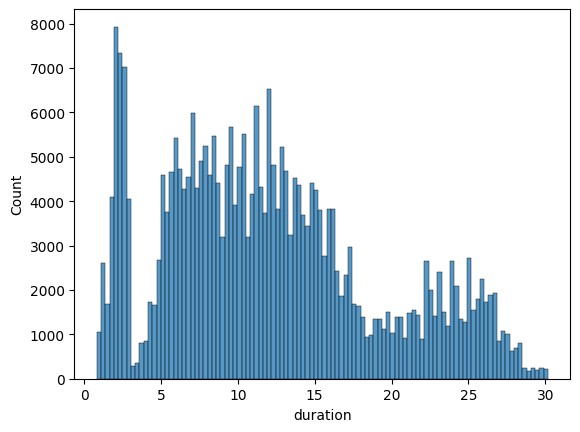

In [326]:
sns.histplot(x='duration',data=df) 

<Axes: xlabel='duration'>

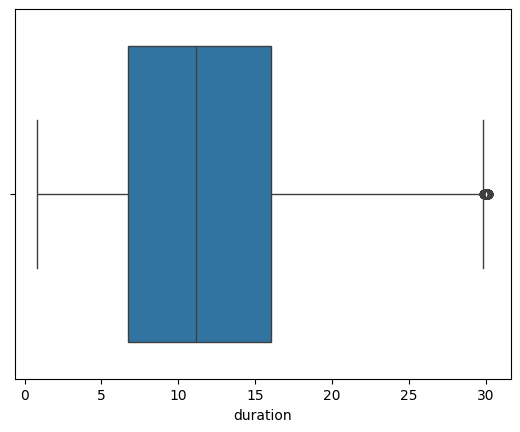

In [327]:
sns.boxplot(x='duration',data=df)

#### insights 
- the distribution is less skewed now after removing the incorrect values

--------------------------------------------------------

<Axes: >

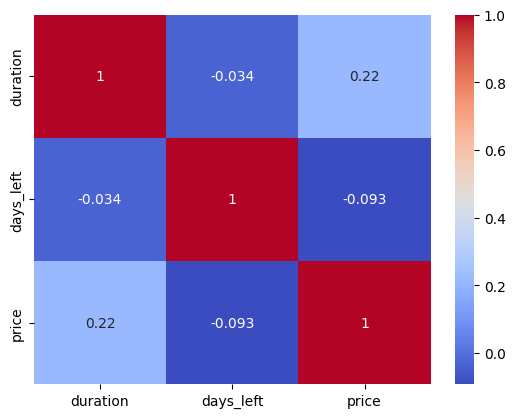

In [328]:
numerical_data=df.select_dtypes(include=['float64','int64'])
corr=numerical_data.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

<Axes: xlabel='days_left', ylabel='price'>

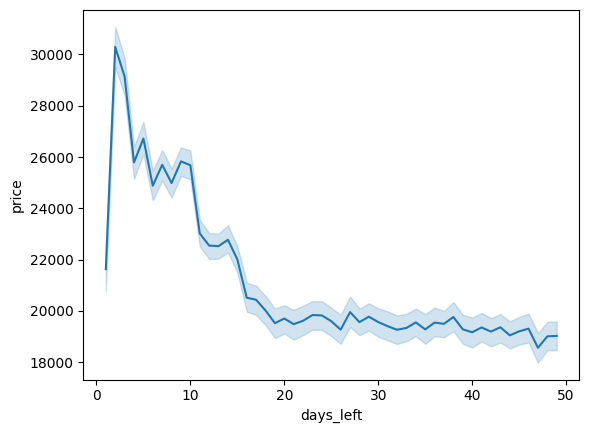

In [329]:
sns.lineplot(x='days_left',y='price',data=df)

<Axes: xlabel='days_left', ylabel='price'>

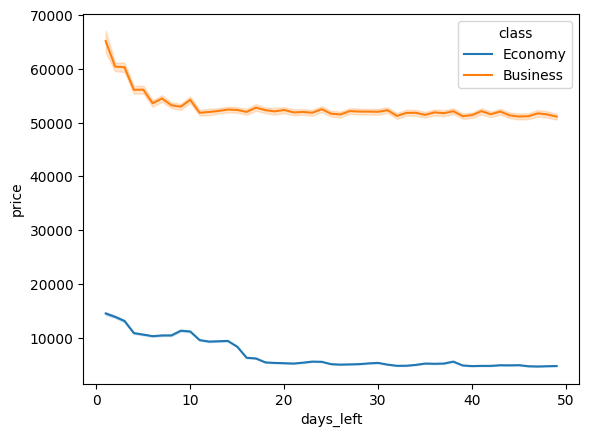

In [330]:
sns.lineplot(x='days_left',y='price',data=df,hue='class')

<Axes: xlabel='days_left', ylabel='price'>

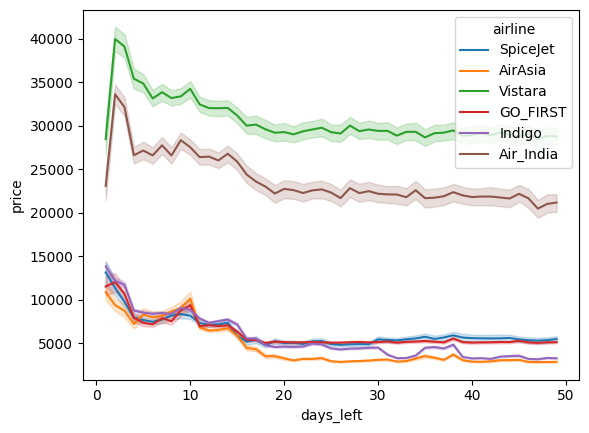

In [331]:
sns.lineplot(x='days_left',y='price',data=df,hue='airline')

#### insight:
- as the number of days left increases the price decreases

<Axes: xlabel='duration', ylabel='price'>

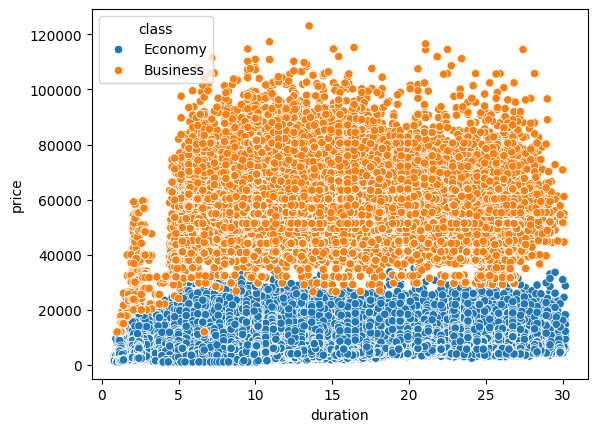

In [332]:
sns.scatterplot(x='duration',y='price',data=df,hue='class')

<Axes: xlabel='duration', ylabel='price'>

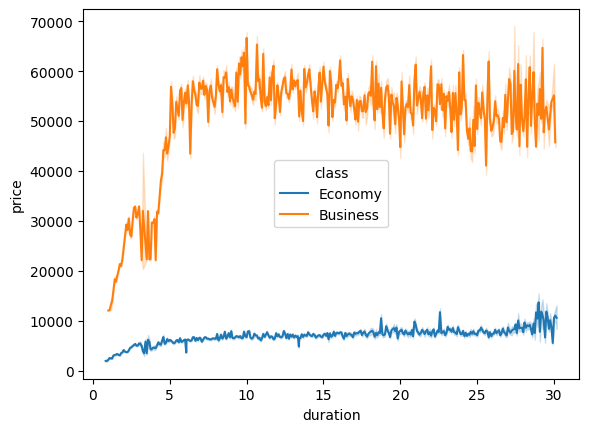

In [333]:
sns.lineplot(x='duration',y='price',data=df,hue='class')

<Axes: xlabel='duration', ylabel='price'>

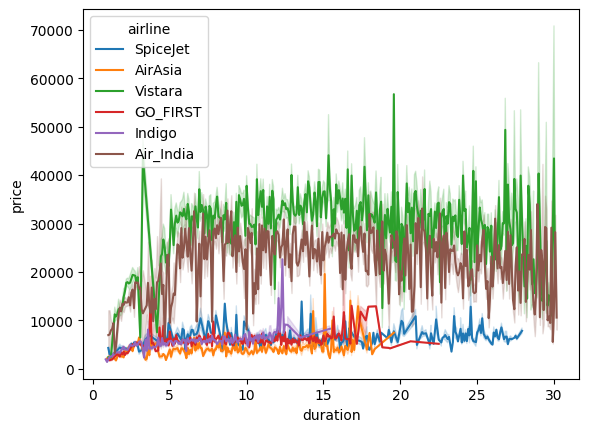

In [334]:
sns.lineplot(x='duration',y='price',data=df,hue='airline')

#### insight:
 - i think duration does not have a big effect on price and it doesn't show a fixed relation

----------------------------------------------------------

<Axes: xlabel='class', ylabel='price'>

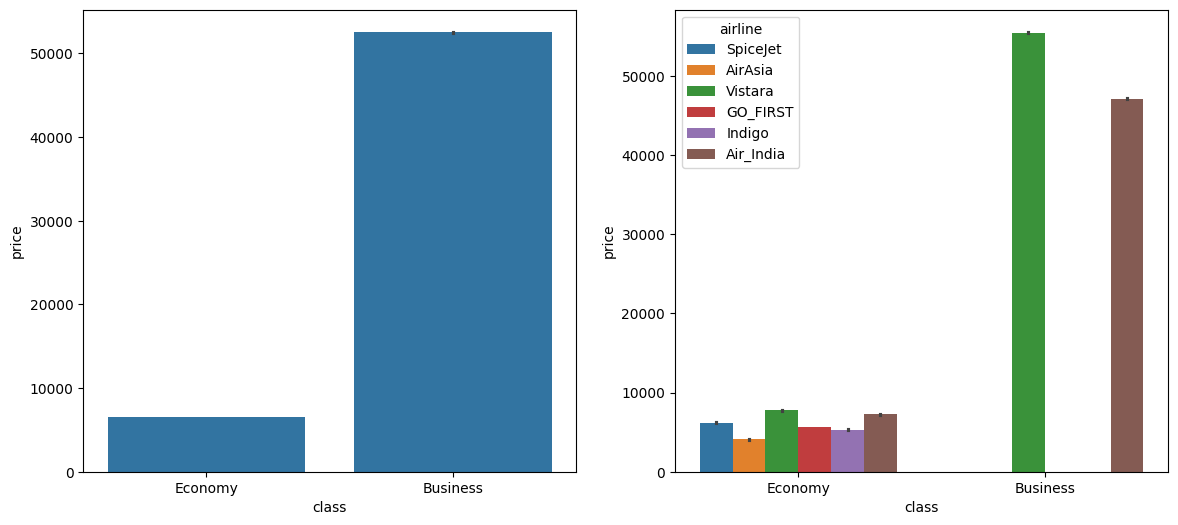

In [335]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)

sns.barplot(x='class',y='price',data=df)
plt.subplot(1,2,2)

sns.barplot(x='class',y='price',data=df,hue='airline')

<Axes: xlabel='airline', ylabel='price'>

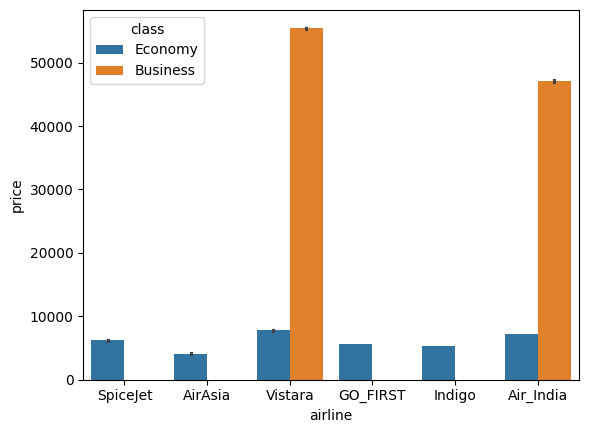

In [336]:
sns.barplot(x='airline',y='price',data=df,hue='class')

#### insights
- business class has a higher average price than economy which is logical in economy the two airlines that offer only business class have the highest averages as well                                                              

<Axes: xlabel='stops', ylabel='price'>

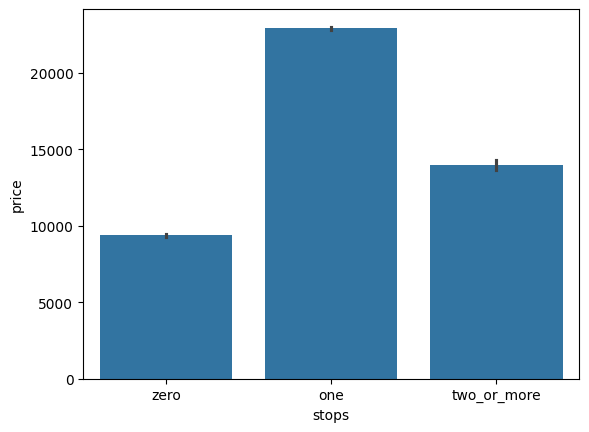

In [337]:
sns.barplot(x='stops',y='price',data=df)

<Axes: xlabel='price'>

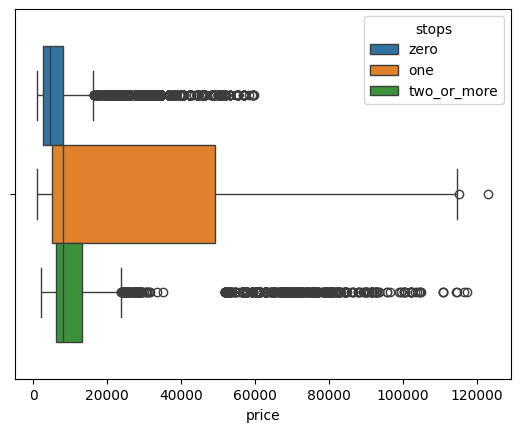

In [338]:
sns.boxplot(x='price',hue='stops',data=df)

#### insights
- flights with one or two or more stops have higher prices than nonstop flights which is illogical so i think the number of stops is not a main factor in the price

<Axes: xlabel='departure_time', ylabel='price'>

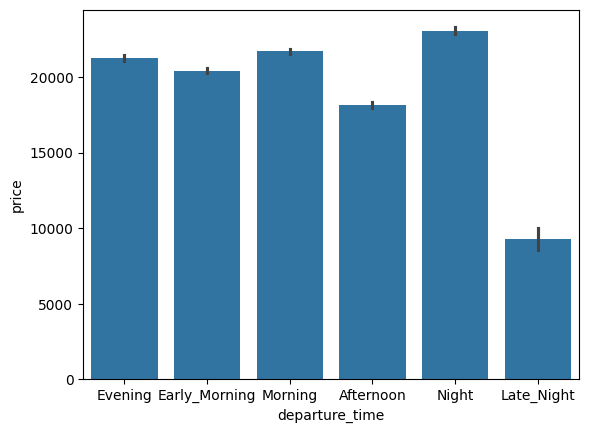

In [339]:
sns.barplot(x='departure_time',y='price',data=df)

<Axes: xlabel='departure_time', ylabel='price'>

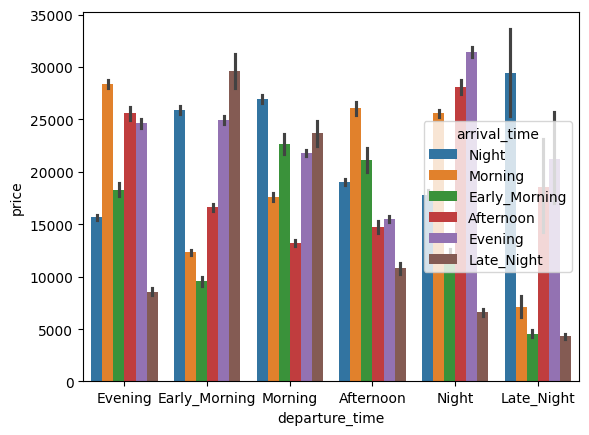

In [340]:
sns.barplot(x='departure_time',y='price',data=df,hue='arrival_time')

<Axes: xlabel='source_city', ylabel='price'>

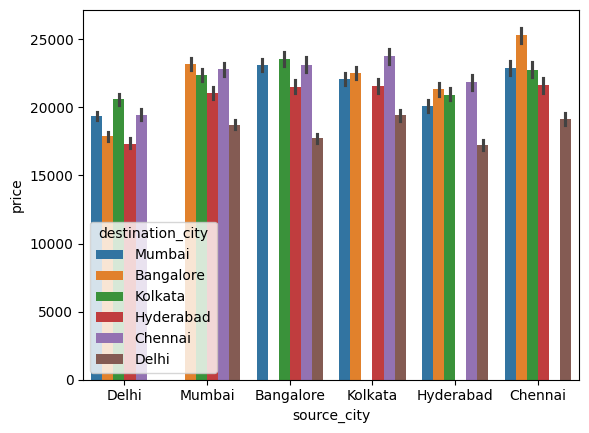

In [341]:
sns.barplot(x='source_city',y='price',hue='destination_city',data=df)

#### insights 
- all the flight between any 2 differenet city has approximatly the same average price so there is not a pattern or 2 city (source + dest) that always higher so it is not a main factor also on the price

------------------------------------------------------------------------------------------------

## Encoding

In [342]:
df = df.drop('flight', axis=1)


#### insights :
- Drop flights column due to it's large size, to avoid having a very large dataset when encoding the categorical feature and dimensionality errrors

In [343]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

cols_to_encode = ['airline', 'source_city','departure_time','arrival_time','destination_city']
df[cols_to_encode] = df[cols_to_encode].fillna('missing')
one_hot_encoder = OneHotEncoder(sparse_output=False)

encoded_array = one_hot_encoder.fit_transform(df[cols_to_encode])

encoded_df = pd.DataFrame(encoded_array, columns=one_hot_encoder.get_feature_names_out(cols_to_encode),index=df.index)
df = df.drop(cols_to_encode, axis=1)
df = pd.concat([df, encoded_df], axis=1)

print(df)


       stops     class  duration  days_left  price  airline_AirAsia  \
0       zero   Economy      2.17          1   5953              0.0   
1       zero   Economy      2.33          1   5953              0.0   
2       zero   Economy      2.17          1   5956              1.0   
3       zero   Economy      2.25          1   5955              0.0   
4       zero   Economy      2.33          1   5955              0.0   
...      ...       ...       ...        ...    ...              ...   
300148   one  Business     10.08         49  69265              0.0   
300149   one  Business     10.42         49  77105              0.0   
300150   one  Business     13.83         49  79099              0.0   
300151   one  Business     10.00         49  81585              0.0   
300152   one  Business     10.08         49  81585              0.0   

        airline_Air_India  airline_GO_FIRST  airline_Indigo  airline_SpiceJet  \
0                     0.0               0.0             0.0       

In [344]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])
df['stops'] = label_encoder.fit_transform(df['stops'])

print(df)

        stops  class  duration  days_left  price  airline_AirAsia  \
0           2      1      2.17          1   5953              0.0   
1           2      1      2.33          1   5953              0.0   
2           2      1      2.17          1   5956              1.0   
3           2      1      2.25          1   5955              0.0   
4           2      1      2.33          1   5955              0.0   
...       ...    ...       ...        ...    ...              ...   
300148      0      0     10.08         49  69265              0.0   
300149      0      0     10.42         49  77105              0.0   
300150      0      0     13.83         49  79099              0.0   
300151      0      0     10.00         49  81585              0.0   
300152      0      0     10.08         49  81585              0.0   

        airline_Air_India  airline_GO_FIRST  airline_Indigo  airline_SpiceJet  \
0                     0.0               0.0             0.0               1.0   
1        

------------------------------------------------------------------------

## Split

In [345]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = np.log(df['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44, shuffle=True)


## scaling

In [346]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train[['duration', 'days_left']] = min_max_scaler.fit_transform(X_train[['duration',	'days_left']])
X_test[['duration', 'days_left']] = min_max_scaler.transform(X_test[['duration',	'days_left']])


print(df)

        stops  class  duration  days_left  price  airline_AirAsia  \
0           2      1      2.17          1   5953              0.0   
1           2      1      2.33          1   5953              0.0   
2           2      1      2.17          1   5956              1.0   
3           2      1      2.25          1   5955              0.0   
4           2      1      2.33          1   5955              0.0   
...       ...    ...       ...        ...    ...              ...   
300148      0      0     10.08         49  69265              0.0   
300149      0      0     10.42         49  77105              0.0   
300150      0      0     13.83         49  79099              0.0   
300151      0      0     10.00         49  81585              0.0   
300152      0      0     10.08         49  81585              0.0   

        airline_Air_India  airline_GO_FIRST  airline_Indigo  airline_SpiceJet  \
0                     0.0               0.0             0.0               1.0   
1        

## Fit

In [347]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [348]:
predictions= model1.predict(X_test)
predections_train=model1.predict(X_train)

## Evaluate

In [349]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print ( "TRAIN MEAN SQUARE ERROR",mean_squared_error(y_train,predections_train))
print ( "TEST MEAN SQUARE ERROR",mean_squared_error(y_test,predictions))

print ( "TRAIN MEAN ABS ERROR",mean_absolute_error(y_train,predections_train))
print ( "TEST MEAN ABS ERROR",mean_absolute_error(y_test,predictions))

print ( "TRAIN R^2 ERROR",r2_score(y_train,predections_train))
print ( "TEST R^2 ERROR",r2_score(y_test,predictions))

TRAIN MEAN SQUARE ERROR 0.1118001212762152
TEST MEAN SQUARE ERROR 0.11133873579648501
TRAIN MEAN ABS ERROR 0.26312836659468136
TEST MEAN ABS ERROR 0.26252694102590446
TRAIN R^2 ERROR 0.910067599608823
TEST R^2 ERROR 0.9106569011807001


#### insights 
- no overfitting or underfitting and using the log scale for price improves accuracy